<a href="https://colab.research.google.com/github/XxProFetxX/Gama-Find/blob/master/Copia_de_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git


Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 268 (delta 150), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (268/268), 274.11 KiB | 5.48 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [ ]:
from algorithmic_complexity.aclib import graphstuff as gs

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import math
import heapq as hq

In [ ]:
url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblacionesDF = pd.read_csv(url)

In [ ]:
print(len(poblacionesDF))
poblacionesDF.head()

3757


,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
0,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.422545,-78.45299,311,1206
1,AMAZONAS,BAGUA,ARAMANGO,RESERVA UJUCANO,-5.427565,-78.444372,44,129
2,AMAZONAS,BAGUA,ARAMANGO,TUTUMBEROS,-5.327317,-78.44472,49,179
3,AMAZONAS,BAGUA,BAGUA,ALENYA BAJO,-5.682439,-78.495229,3,8
4,AMAZONAS,BONGARA,CUISPES,MITOPAMPA,-5.93856,-77.965302,1,4


In [ ]:
nomprovincias = poblacionesDF['PROVINCIA'].unique()
print(len(nomprovincias))
nomprovincias

157


array(['BAGUA', 'BONGARA', 'CHACHAPOYAS', 'UTCUBAMBA', 'ANTONIO RAYMONDI',
       'BOLOGNESI', 'CARHUAZ', 'CASMA', 'HUARAZ', 'HUARI', 'HUAYLAS',
       'OCROS', 'POMABAMBA', 'RECUAY', 'SANTA', 'SIHUAS', 'YUNGAY',
       'ABANCAY', 'ANDAHUAYLAS', 'ANTABAMBA', 'AYMARAES', 'CHINCHEROS',
       'GRAU', 'AREQUIPA', 'CAMANA', 'CARAVELI', 'CASTILLA', 'CAYLLOMA',
       'CONDESUYOS', 'CANGALLO', 'HUAMANGA', 'HUANCA SANCOS', 'HUANTA',
       'LUCANAS', 'PARINACOCHAS', 'VICTOR FAJARDO', 'CAJABAMBA',
       'CAJAMARCA', 'CELENDIN', 'CHOTA', 'CONTUMAZA', 'CUTERVO', 'JAEN',
       'SAN IGNACIO', 'SAN MARCOS', 'SAN MIGUEL', 'SAN MIMGUEL',
       'SANTA CRUZ', 'ACOMAYO', 'CALCA', 'CANAS', 'CANCHIS',
       'CHUMBIVILCAS', 'LA CONVENCION', 'PARURO', 'QUISPICANCHI',
       'PROVINCIA', 'CASTROVIRREYNA', 'CHURCAMPA', 'HUANCAVELICA',
       'HUAYTARA', 'TAYACAJA', 'AMBO', 'DOS DE MAYO', 'DOSDEMAYO',
       'HUAMALIES', 'HUANUCO SANTA', 'HUANUCO', 'LAURICOCHA',
       'LEONCIO PRADO', 'MARAÑON', 'PUERTO I

In [ ]:
provincias = dict()
for nom in nomprovincias:
  provincias[nom] = poblacionesDF[poblacionesDF['PROVINCIA'] == nom]
  print(nom, len(provincias[nom]))

BAGUA 4
BONGARA 8
CHACHAPOYAS 1
UTCUBAMBA 12
ANTONIO RAYMONDI 2
BOLOGNESI 5
CARHUAZ 20
CASMA 14
HUARAZ 38
HUARI 20
HUAYLAS 5
OCROS 2
POMABAMBA 21
RECUAY 28
SANTA 22
SIHUAS 6
YUNGAY 7
ABANCAY 41
ANDAHUAYLAS 8
ANTABAMBA 2
AYMARAES 23
CHINCHEROS 12
GRAU 1
AREQUIPA 24
CAMANA 16
CARAVELI 16
CASTILLA 1
CAYLLOMA 20
CONDESUYOS 3
CANGALLO 20
HUAMANGA 3
HUANCA SANCOS 38
HUANTA 7
LUCANAS 92
PARINACOCHAS 1
VICTOR FAJARDO 29
CAJABAMBA 10
CAJAMARCA 13
CELENDIN 16
CHOTA 6
CONTUMAZA 16
CUTERVO 6
JAEN 11
SAN IGNACIO 2
SAN MARCOS 2
SAN MIGUEL 13
SAN MIMGUEL 1
SANTA CRUZ 1
ACOMAYO 14
CALCA 3
CANAS 4
CANCHIS 12
CHUMBIVILCAS 3
LA CONVENCION 13
PARURO 14
QUISPICANCHI 22
PROVINCIA 1
CASTROVIRREYNA 49
CHURCAMPA 1
HUANCAVELICA 6
HUAYTARA 32
TAYACAJA 1
AMBO 37
DOS DE MAYO 7
DOSDEMAYO 1
HUAMALIES 6
HUANUCO SANTA 1
HUANUCO 27
LAURICOCHA 11
LEONCIO PRADO 28
MARAÑON 12
PUERTO INCA 9
CHINCHA 1
ICA 60
NASCA 6
PALPA 30
PISCO 14
CHANCHAMAYO 14
CHUPACA 13
CONCEPCION 1
HUANCAYO 13
JAUJA 1
JUNIN 2
SATIPO 6
TARMA 35
ASCOPE

In [ ]:

#@title Provincia 
#@markdown Ingrese la provincia

no_type_checking = ''
nom_distrito = 'PASCO' #@param {type:"string"}

In [ ]:
nomdistritos = provincias[nom_distrito]['DISTRITO'].unique()
print(len(nomdistritos))
nomdistritos

6


array(['HUACHON', 'HUARIACA', 'NINACACA', 'PAUCARTAMBO', 'TICLACAYAN',
       'YANACANCHA'], dtype=object)

In [ ]:
distritos = dict()
provincia = provincias[nom_distrito]
for nom in nomdistritos:
  distritos[nom] = provincia[provincia['DISTRITO'] == nom]
  print(nom, len(distritos[nom]))

HUACHON 2
HUARIACA 5
NINACACA 1
PAUCARTAMBO 11
TICLACAYAN 5
YANACANCHA 9


In [ ]:
distrito = distritos['TICLACAYAN']
pro = provincias['PACASMAYO']

In [ ]:
def dist(cp1, cp2):
  x1, y1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  x2, y2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])

  return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [ ]:
G = nx.Graph()
col = 'CENTRO POBLADO'

for i, cp1 in pro.iterrows():
  for j, cp2 in pro.iterrows():
    if cp1[col] != cp2[col]:
      G.add_edge(cp1[col], cp2[col], weight=dist(cp1, cp2))

In [ ]:
for u in G.nodes:
  G.nodes[u]['visited']= False
  G.nodes[u]['path'] = ' '
  G.nodes[u]['cost'] = -1.0
nombre = 'CALERA'
G.nodes[nombre]['cost'] = 0
cola = [(0,nombre)]
  
menor = 0
while cola:
  _, n = hq.heappop(cola)
  if not G.nodes[n]['visited']:

    G.nodes[n]['visited'] = True

  for v in G.neighbors(n):

    if not G.nodes[v]['visited']:
      costo = G.edges[n, v]['weight']

      if G.nodes[v]['cost'] != -1 and costo < G.nodes[v]['cost']:
        G.nodes[v]['cost'] = costo      
        G.nodes[v]['path'] = n   
        hq.heappush(cola,(costo,v))  

      elif G.nodes[v]['cost'] == -1:
        G.nodes[v]['cost'] = costo 
        G.nodes[v]['path'] = n
        hq.heappush(cola,(costo,v))      
  
        
          
P = nx.Graph()      
path = [0]*G.number_of_nodes()
prueba =[()]
for v, info in G.nodes.data():
  hq.heappush(prueba,(v,info['visited'], info['cost'], info['path']))
  P.add_edge(v,info['path'], weight = info['cost'])

print(prueba)
  

[(), ('ALTO JEQUETEPEQUE', True, 0.012554282137976693, 'LAS CALABERAS'), ('CALERA', True, 0, ' '), ('ALTO PERU', True, 0.002380693176370002, 'EL HUABITO'), ('BRISAS DE PACASMAYO', True, 0.01606665571921207, 'SAN DEMETRIO'), ('CHAFAN GRANDE', True, 0.019162025075648938, 'MARISCAL CASTILLA'), ('EL HUABITO', True, 0.012438364040336937, 'SANJON MARINUÑEZ'), ('CULTAMBO', True, 0.018738926436686183, 'EL INFIERNILLO'), ('BOCA DEL RIO', True, 0.008204865020213016, 'SANTA MARTHA'), ('BUENOS AIRES', True, 0.03287400979497351, 'LA CONSTANCIA'), ('CALA', True, 0.038992689699480894, 'CAVOUR'), ('DIOS TEDE', True, 0.03826314595010774, 'BUENOS AIRES'), ('LACHE CHICO', True, 0.022576487791503154, 'JAGUEY (EL JAGUEY)'), ('LETANA', True, 0.013889867169989165, 'LACHE CHICO'), ('PLATANAR', True, 0.008588208951803697, 'LA JULIANA'), ('SANJON MARINUÑEZ', True, 0.014394689472163153, 'GUADALUPE'), ('EL INFIERNILLO', True, 0.016346237151105964, 'LAS VEGAS'), ('JAGUEY (EL JAGUEY)', True, 0.03636534819027649, 'C

In [ ]:
gs.nx2gv(G, weighted=True, params={'size':'30'})

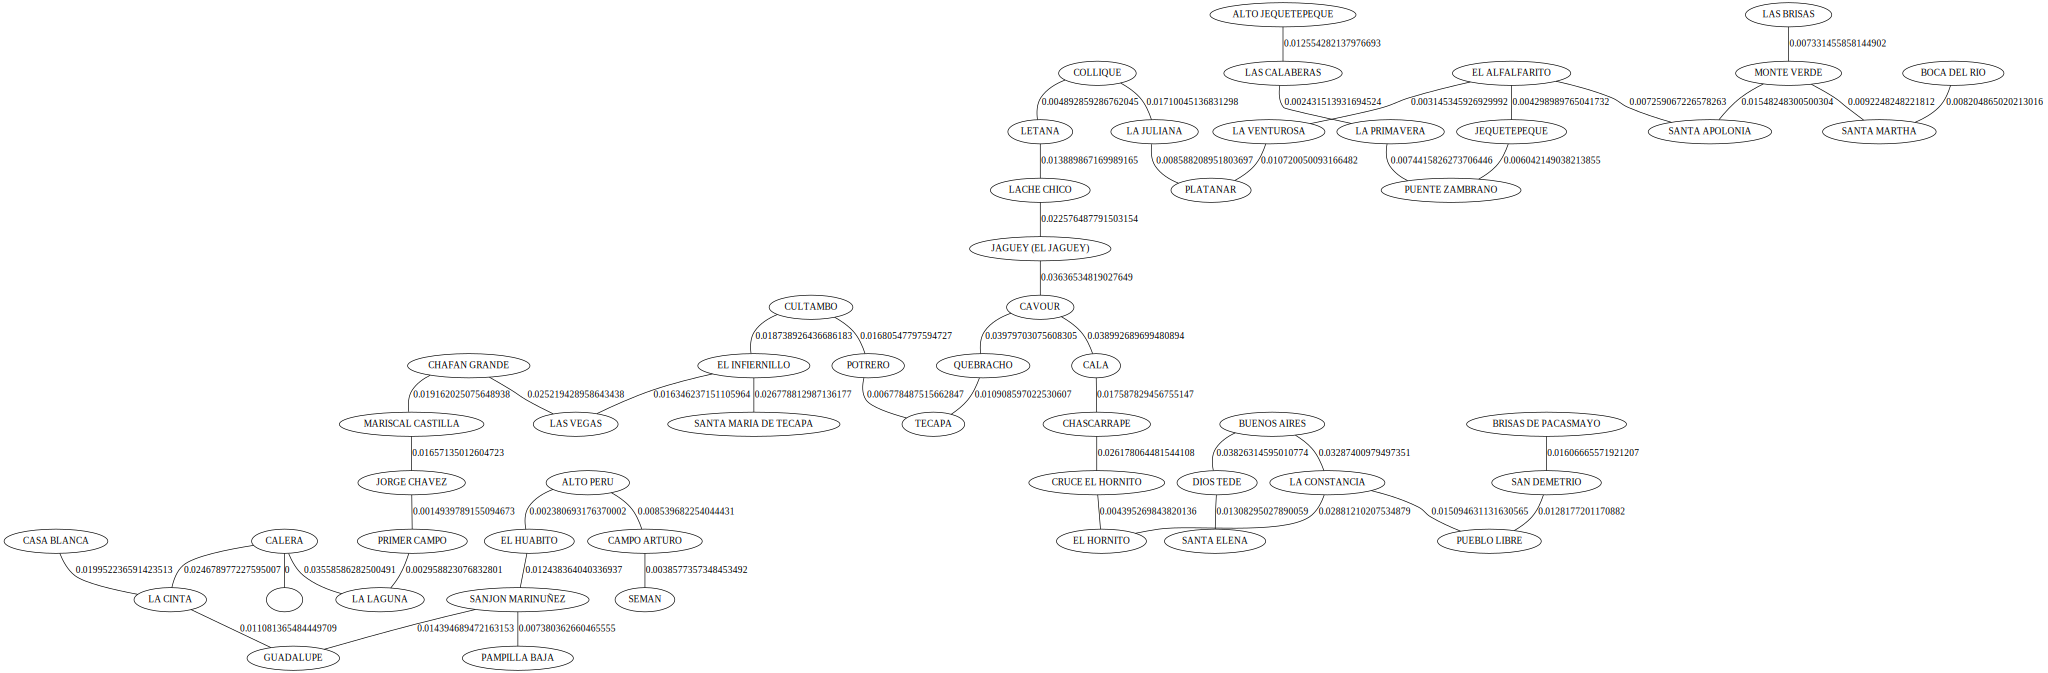

In [ ]:
gs.nx2gv(P, weighted=True, params={'size':'30'})

In [ ]:
print(primAl(G, 'EL PALMO')) #P1


NameError: ignored

In [ ]:

print (G.edges[('EL PALMO','DOS CORRALES')]) #P2

KeyError: ignored

In [ ]:
nombre = 'DOS CORRALES' #P3
list_neighbors = G.neighbors(nombre)
for i in list_neighbors:
  if G.edges[(nombre,i)]["weight"] > 0.030:
     print (i,G.edges[(nombre,i)])

NetworkXError: ignored

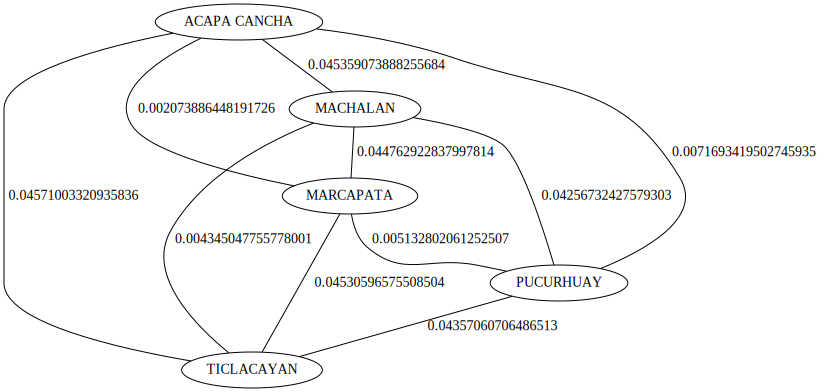

In [ ]:
gs.nx2gv(G, weighted=True, params={'size':'30'})